In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from functions_definitions import *

In [2]:
file_path_baseend = ('/Users/jeremieengler/Documents/Cloud/Travail_cloud/EPFL/MA1/Non linear analysis of structures/Nouveau github/Non-Linear-Analysis/Projet/Source/Lignos - Base end moment-chord rotation response/C1.csv')
file_path_topend = ('/Users/jeremieengler/Documents/Cloud/Travail_cloud/EPFL/MA1/Non linear analysis of structures/Nouveau github/Non-Linear-Analysis/Projet/Source/Lignos - Top end moment-chord rotation response/C1_Top.csv')
file_path_loadingprotocol = ('/Users/jeremieengler/Documents/Cloud/Travail_cloud/EPFL/MA1/Non linear analysis of structures/Nouveau github/Non-Linear-Analysis/Projet/Source/Lignos - Loading protocol/C1.csv')

In [3]:
def csv_plot(file_path, file_name):

    data = pd.read_csv(file_path).drop(pd.read_csv(file_path).columns[0], axis = 1)
    col=list(data.columns)

    if 'Base moment [kN.m]' in col :
        a=data['Rotation']
        a_text='Rotation'
        b=data['Base moment [kN.m]']
        b_text='Base moment [kN.m]'
        c = data['Axial_Disp. [mm]']
        c_text='Axial_Disp. [mm]'
        donnees=[a,b,c]
        plt.plot(c , a, linestyle='-', linewidth=1, color='green', label=f'{c_text} vs {a_text}')
        plt.xlabel(c_text)
        plt.ylabel(a_text)
        plt.title(f'Relation entre {c_text} et {a_text} (Diagramme de lignes), file: {file_name}')
        plt.legend()
        plt.show()


    elif 'Top moment [kN.m]' in col :
        b=data['Top moment [kN.m]']
        b_text='Top moment [kN.m]'
        a=data['Rotation']
        a_text='Rotation'
        donnees=[a,b]
 
    elif 'Time[sec]' in col :
        a = data['Time[sec]']
        a_text='Time[sec]'
        b=data['Top_Inplane_Disp[mm]']
        b_text='Top_Inplane_Disp[mm]'
        donnees=[a,b]

    plt.plot(a, b, linestyle='-', linewidth=1, color='green', label=f'{a_text} vs {b_text}')
    # Ajouter des labels et un titre
    plt.xlabel(a_text)
    plt.ylabel(b_text)
    plt.title(f'Relation entre {a_text} et {b_text} (Diagramme de lignes), file: {file_name}')
    plt.legend()

    # Afficher le graphique
    plt.show()

    #for i in donnees:
        #if i=='Axial_Disp. [mm]':
            #plt.plot(c , b, linestyle='-', linewidth=1, color='green', label=f'{c_text} vs {b_text}')
            #plt.xlabel(c_text)
            #plt.ylabel(b_text)
            #plt.title(f'Relation entre {c_text} et {b_text} (Diagramme de lignes), file: {file_name}')
            #plt.legend()
            #plt.show()
    

    return None

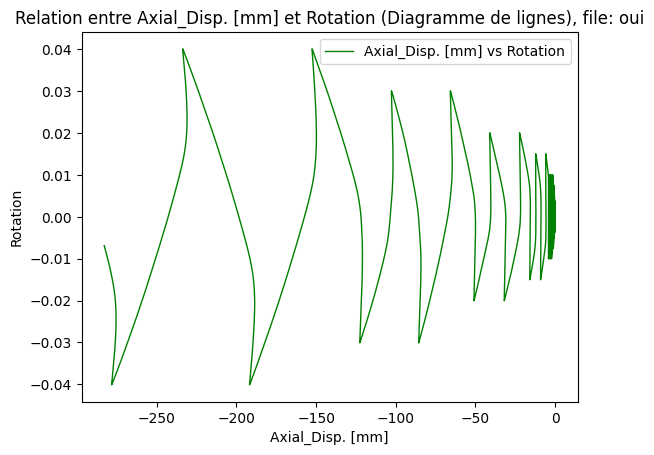

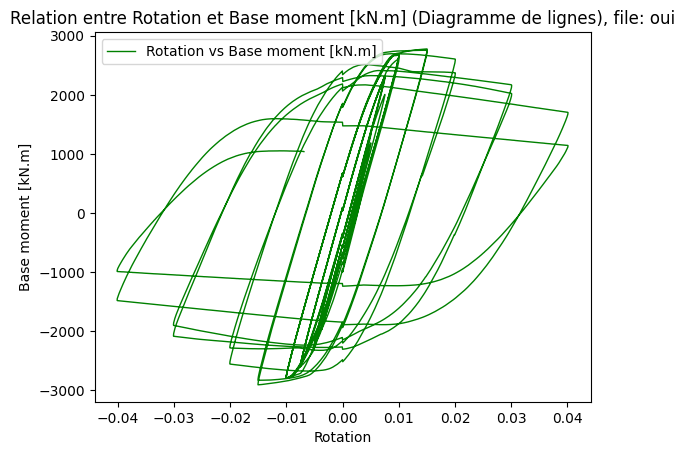

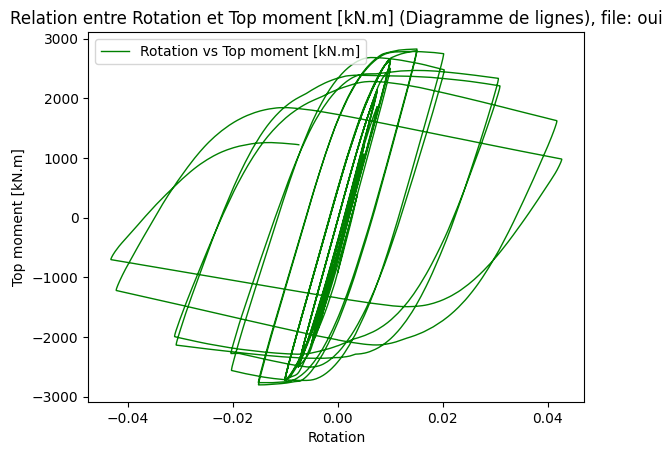

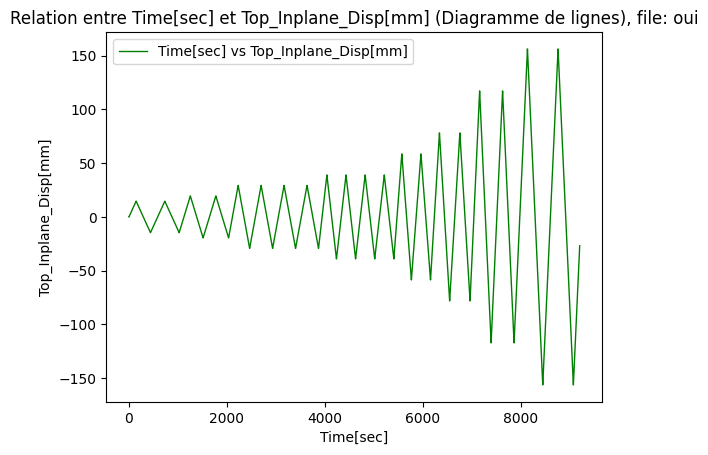

In [4]:
csv_plot(file_path_baseend, "oui")
csv_plot(file_path_topend, "oui")
csv_plot(file_path_loadingprotocol, "oui")

Critical limit states on the measured hysteretic behaviour from the experiment 

In [5]:
#flexural yielding at top

def flex_yielding_top(file_path):

    data = pd.read_csv(file_path).drop(pd.read_csv(file_path).columns[0], axis = 1)
    col=list(data.columns)

    if 'Top moment [kN.m]' in col:
        rot=data['Rotation']
        M=data['Top moment [kN.m]']
        a=(rot.iloc[1]-rot.iloc[0])/(M.iloc[1]-M.iloc[0])
        print(a)
        print(f'{rot.iloc[1]= }')
        for i in range(len(data['Top moment [kN.m]'])):
            b=(rot.iloc[i+1]-rot.iloc[i])/(M.iloc[i+1]-M.iloc[i])

            if np.isclose(a, b, rtol=1e-03, atol=1e-03, equal_nan=False):
                a=b
            else:
                return M.iloc[i+1], rot.iloc[i+1], i



In [6]:
#flexural yielding at base

def flex_disp_base(file_path):

    data = pd.read_csv(file_path).drop(pd.read_csv(file_path).columns[0], axis = 1)
    col=list(data.columns)

    if 'Base moment [kN.m]' in col:
        rot=data['Rotation']
        M=data['Base moment [kN.m]']
        disp=data['Axial_Disp. [mm]']
        
        #flexural yielding
        a=(rot.iloc[1]-rot.iloc[0])/(M.iloc[1]-M.iloc[0])
        print(a)
        print(f'{rot.iloc[1]= }')
        for i in range(len(data['Base moment [kN.m]'])-1):
            b=(rot.iloc[i+1]-rot.iloc[i])/(M.iloc[i+1]-M.iloc[i])

            if np.isclose(a, b, rtol=1e-03, atol=1e-03, equal_nan=False):
                a=b
            else:
                My=M.iloc[i]
                theta_y=rot.iloc[i]
                num=i+1
                d=disp.iloc[i]
    
    return My, theta_y, num,d
  

In [7]:
flex_disp_base(file_path_baseend)



8.633472770608444e-06
rot.iloc[1]= 8.49368e-08


(1043.147293, -0.007693055, 45946, -282.366992)

In [8]:
flex_yielding_top(file_path_topend)

-9.4889527964108e-06
rot.iloc[1]= 8.49367988083576e-08


(-2740.65191669619, -0.0076001870625455, 28561)

In [9]:
#local buckling



Monotonic backbone

In [10]:
#XS variables

Z= #plastic modulus
h/tw=33.3
Lb/ry=51.7


SyntaxError: invalid syntax (2767395537.py, line 3)

In [11]:
#variables

fy=414 #MPa - yield strength from the paper
Pye= #axial yielding strength
Pg= #gravity induced compressive load

Ry= #expected to nominal yield stress ratio
fyn= #nominal yield strength of the steel material


SyntaxError: invalid syntax (2709421174.py, line 4)

In [12]:
#flexural_strength_parameters

def flexural_strength_param(Pye,Pg, Z,Ry,fyn, h, tw,Lb,ry):

    #effective yield strength
    if Pg/Pye<0.2:
        My=1.15*Z*Ry*fyn*(1-0.5*Pg/Pye)
    else:
        My=1.15*Z*Ry*fyn*9/8*(1-Pg/Pye)
    print(f"Effective yield strength : {My=}")

    #hardening ratio
    a=9.5*(h/tw)^(-0.4)*(Lb/ry)^(-0.16)*(1-Pg/Pye)^0.2
    if a<1:
        a=1
    elif a>1.3:
        a=1.3
    print(f"Hardening ratio : {a =}")

    #residual flexural strength
    Mr= (0.4-0.4*Pg/Pye)*My
    print(f"Residual flexural strength: {Mr=}")

    return My, a, Mr

In [13]:
#plastic deformation parameters

def plastic_deformation_param(Pg,Pye):

    #pre-peak plastic rotation
    theta_P=294*(h/tw)^(-1.7)*(Lb/ry)^(-0.7)*(1-Pg/Pye)^(1.6)
    if theta_P>0.2:
        theta_P=0.2
    print(f"pre-peak plastic rotation: {theta_P =}")

    #post-peak plastic deformation capacity
    thera_pc=14*(h/tw)^(-0.8)*(Lb/ry)^(-0.5)*(1-Pg/Pye)^3.2
    if theta_pc>0.1:
        theta_pc=0.1
    print(f"pre-peak plastic rotation: {theta_pc=}")

    #ultimate rotation
    theta_u=0.08*(1-0.6*Pg/Pye)
    print(f"ultimate rotation: {theta_u=}")

    return theta_P, theta_pc, theta_u

In [14]:
#reference cumulative plastic rotation capacity

def f_lambda_s(Pg,Pye):
    if Pg/Pye>0.35:
        lambda_s=268000*(h/tw)^(-2.3)*(Lb/ry)^(-1.30)*(1-Pg/Pye)^1.19
    else:
        lambda_s=25000*(h/tw)^(-2.14)*(Lb/ry)^(-0.53)*(1-Pg/Pye)^4.92
    
    print(f"reference cumulative plastic rotation capacity: {lambda_s=}")

    return lambda_s

#note: this parameter controls the cyclic basic strength deteriration of a steel column

In [ ]:
def ShearModulus():
    
